# Exercise 3 - Unsteady two-dimensional heat equation

In our prior exercise, we looked at solutions of the 2D _steady_ heat equation. In this exercise, we're going to solve the 2D _unsteady_ heat equation. In so doing, we will compare the relative accuracy and efficiency of implicit and explicit solution methods.

For completeness, I will keep the preliminary information regarding governing equations, computational domain, etc. in this exercise.


## Governing equation
We wish to compute the numerical solution of the two-dimensional unsteady heat equation:

$$ \dfrac{\partial T}{\partial t} - \alpha \left( \dfrac{\partial^2 T}{\partial x^2} + \dfrac{\partial^2 T}{\partial y^2}\right) = q(x,y,t).$$

This is obviously an unsteady equation because of the time derivative. We have also added a source term $q(x,y,t)$, which represents a heat source that can vary in time and space.

## Computational domain and boundary conditions
We will solve this PDE using a finite difference method in space in a rectangular domain defined by

$$x \in [-1,1]$$
$$y \in [-1,1].$$

We will use fixed boundary conditions of $0^{\circ}$C on all sides.

## Source term
We will impose a steady, non-uniform source term defined as follows:

$$q(x,y) = Q_0 \exp \left( -\dfrac{(x^2 + y^2)}{2 \sigma^2} \right)$$

where $\sigma = 0.1$ and $Q_0$ is 200$^{\circ}$C/s. This represents a steady Gaussian function with a maximum value at (0,0) and uniform radial decay.

## Numerical schemes

We will use the following numerical schemes to solve this system:

### Simple explicit method
If we approximate the time derivative term in our governing equation with a forwards difference and the spatial terms with centered differences, we obtain the _simple explicit_ method:

$$ \dfrac{T_{i,j}^{n+1} - T_{i,j}^n}{\Delta t} = \alpha \dfrac{T_{i+1,j}^n - 2T_{i,j}^n + T_{i-1,j}^n}{\Delta x^2} + \alpha \dfrac{T_{i,j+1}^n - 2T_{i,j}^n + T_{i,j-1}^n}{\Delta y^2} + q. $$


Rearranging yields a simple, explicit expression for $T_{i,j}^{n+1}$:

$$ \boxed{T_{i,j}^{n+1} = r \left(T_{i+1,j}^n - 2T_{i,j}^n + T_{i-1,j}^n \right) + \beta^2 r \left(T_{i,j+1}^n - 2T_{i,j}^n + T_{i,j-1}^n\right) + T_{i,j}^n + \Delta t q}. $$

where $\beta$ and $r$ are
$$ \beta = \dfrac{\Delta x}{\Delta y} \quad \quad r = \dfrac{\alpha \Delta t}{\Delta x^2}.$$

It can be shown that the scheme is stable for $0 \leq (1+\beta^2)r \leq \frac{1}{2}$. For a grid with $\beta = 1$, this stability criterion becomes $r\leq \frac{1}{4}$, which is a very restrictive constraint, yielding small time step sizes and long simulation times.

### Dufort-Frankel method
The simple explicit method above is regrettably only first-order accurate. To increase temporal accuracy, we use a centered difference for the time derivative:

$$ \dfrac{T_{i,j}^{n+1} - T_{i,j}^{n-1}}{2\Delta t} = \alpha \dfrac{T_{i+1,j}^n - 2T_{i,j}^n + T_{i-1,j}^n}{\Delta x^2} + \alpha \dfrac{T_{i,j+1}^n - 2T_{i,j}^n + T_{i,j-1}^n}{\Delta y^2} + q. $$

Moreover, we treat the $T_{i,j}^n$ terms as the average of the prior and next time steps:

$$ T_{i,j}^n = \dfrac{T_{i,j}^{n+1} + T_{i,j}^{n-1}}{2}.$$

Applying the above to the discretized equation and simplifying yields a two-time level variant of the simple explicit method called the Dufort-Frankel method:

$$ \boxed{T_{i,j}^{n+1} = \dfrac{2r \left(T_{i+1,j}^n - T_{i,j}^{n-1} + T_{i-1,j}^n \right) + 2\beta^2 r \left(T_{i,j+1}^n - T_{i,j}^{n-1} + T_{i,j-1}^n\right) + T_{i,j}^{n-1} + 2\Delta t q}{1 + 2r + 2\beta^2 r}}. $$


### Alternating direction implicit (ADI)
Returning to the simple explicit method, if instead evaluating the spatial term at the $n$ time level, we evaluated them at the $n+1$ time level, we get

$$ {T_{i,j}^{n+1} = r \left(T_{i+1,j}^{n+1} - 2T_{i,j}^{n+1} + T_{i-1,j}^{n+1} \right) + \beta^2 r \left(T_{i,j+1}^{n+1} - 2T_{i,j}^{n+1} + T_{i,j-1}^{n+1}\right) + T_{i,j}^n + \Delta t q}. $$

One can see that this is an _implicit_ formulation and there are five unknowns in the equation at the $n+1$ time level. As a result, this formulation is not tridiagonal and thus more expensive solution methods are required to solve the algebraic system of equations. We can address this difficulty by treating it as a mixed implicit/explicit scheme with two steps. In the first step, the spatial terms are evaluated at an intermediate $(n+1/2)$ time level in one direction and $n$ in the other direction. In the second step, the first direction is evaluated at the $n+1/2$ level and the other direction at $(n+1)$. This is expressed as follows:

Step 1:
$$ \boxed{T_{i,j}^{n+1/2} = 0.5 r \left(T_{i+1,j}^{n+1/2} - 2T_{i,j}^{n+1/2} + T_{i-1,j}^{n+1/2} \right) + 0.5 \beta^2 r \left(T_{i,j+1}^{n} - 2T_{i,j}^{n} + T_{i,j-1}^{n}\right) + T_{i,j}^n + 0.5 \Delta t q}. $$
Step 2:
$$ \boxed{T_{i,j}^{n+1} = 0.5 r \left(T_{i+1,j}^{n+1/2} - 2T_{i,j}^{n+1/2} + T_{i-1,j}^{n+1/2} \right) + 0.5 \beta^2 r \left(T_{i,j+1}^{n+1} - 2T_{i,j}^{n+1} + T_{i,j-1}^{n+1}\right) + T_{i,j}^{n+1/2} + 0.5 \Delta t q}. $$

Step 1 is implicit in $x$ and explicit in $y$. Step 2 is explicit in $x$ and implicit in $y$. Hence it is called _alternating direction implicit_ (ADI) scheme. The ADI scheme is unconditionally stable and has second-order accuracy with a truncation error of $\mathcal{O}[(\Delta x)^2, (\Delta y)^2, (\Delta t)^2]$. To avoid any bias in the solution direction, the order of step 1 and step 2 is reversed on even and odd time steps. This means that on even time steps, $x$ is treated implicitly first and $y$ second, and vice-versa on odd time steps.

#### Assembling the implicit system of equations

The ADI method is implicit and a linear system of equations must be solved in step 1 and 2 at each time step. The linear system can be written as

$$ \mathbf{A} \mathbf{T} = \mathbf{b} $$

where $\mathbf{A}$ is a coefficient matrix, $\mathbf{T}$ is a solution vector, and $\mathbf{b}$ represents the right-hand side vector in the linear system. 

To clearly illustrate how this system is setup, let's consider Step 1 of the ADI method above. We're just starting, so set $i$ = 0 and $j$ = 1 (not $j$ = 0 because the $j=0$ information is already known, as it is fixed by the boundary conditions):

$$i = 0: \quad T_{0,1}^{n+1/2} = 0.5 r ( T_{1,1}^{n+1/2} - 2 T_{0,1}^{n+1/2} ) + 0.5 \beta^2 r ( T_{0,2}^{n} - 2 T_{0,1}^{n} + T_{0,0}^n ) + T_{0,0}^n + 0.5 \Delta t q_{0,1} $$

Notice the $T_{i-1,j}$ term is gone because there are no negative indexed points. Let's move all the unknowns to the left hand side and all the knowns to the right hand side:

$$ i = 0: \quad (1+r) T_{0,1}^{n+1/2} - 0.5r T_{1,1}^{n+1/2} = 0.5 \beta^2 r ( T_{0,2}^{n} - 2 T_{0,1}^{n} + T_{0,0}^{n} ) + T_{0,0}^n + 0.5 \Delta t q_{0,1} $$

Now, let's increment $i$ to $i$ = 1 and write the equation as above:

$$ i = 1: \quad - 0.5r T_{0,1}^{n+1/2} + (1+r) T_{1,1}^{n+1/2} -0.5rT_{2,1}^{n+1/2} = 0.5 \beta^2 r ( T_{1,1}^{n} - 2 T_{1,1}^{n} + T_{1,0}^{n}) + T_{1,1}^n + 0.5 \Delta t q_{1,1} $$

Let's increment $i$ to $i$ = 2, $j$ = 0 and write the equation again:

$$ i = 2: \quad - 0.5r T_{1,1}^{n+1/2} + (1+r) T_{2,1}^{n+1/2} -0.5rT_{3,1}^{n+1/2} = 0.5 \beta^2 r ( T_{2,2}^{n} - 2 T_{2,1}^{n} + T_{2,0}^{n}) + T_{2,1}^n + 0.5 \Delta t q_{2,1} $$

Writing these equations in matrix form for $i = 0 \to n_i$ will look like this:

$$ \left[ 
\begin{array}{ccccccc}
(1+r) & -0.5r & 0 & 0 & 0 & ... & 0  \\
-0.5r & (1+r) & -0.5r & 0 & 0 & ... & 0 \\
0 & -0.5r & (1+r) & -0.5r & 0 & ... & 0 \\
\vdots & \vdots & \ddots & \ddots & \ddots & \dots & \vdots \\
0 & \dots & 0 & 0 & -0.5r & (1+r) & -0.5r  \\
0 & \dots & 0 & 0 & 0 & -0.5r & (1+r) 
\end{array} \right]
\left[
\begin{array}{c}
T_{0,0}^{n+1/2}\\
T_{1,0}^{n+1/2}\\
T_{2,0}^{n+1/2}\\
\vdots \\
T_{n_{i-1},0}^{n+1/2} \\
T_{n_i,0}^{n+1/2}
\end{array}
\right]
=
\left[
\begin{array}{c}
0.5 \beta^2 r ( T_{0,2}^{n} - 2 T_{0,1}^{n} + T_{0,0}^{n} ) + T_{0,0}^n + 0.5 \Delta t q_{0,1} \\
0.5 \beta^2 r ( T_{1,1}^{n} - 2 T_{1,1}^{n} + T_{1,0}^{n} ) + T_{1,1}^n + 0.5 \Delta t q_{1,1} \\
0.5 \beta^2 r ( T_{2,2}^{n} - 2 T_{2,1}^{n} + T_{2,0}^{n} ) + T_{2,1}^n + 0.5 \Delta t q_{2,1} \\
\vdots \\
0.5 \beta^2 r ( T_{n_{i-1},2}^{n} - 2 T_{n_{i-1},1}^{n} + T_{n_{i-1},0}^{n} ) + T_{n_{i-1},1}^n + 0.5 \Delta t q_{n_{i-1},1} \\
0.5 \beta^2 r ( T_{n_{i},2}^{n} - 2 T_{n_{i},1}^{n} + T_{n_{i},0}^{n} ) + T_{n_{i},1}^n + 0.5 \Delta t q_{n_{i},1} \\
\end{array}
\right]
$$

or $$ \mathbf{A} \mathbf{T} = \mathbf{b}. $$

#### Solving the tridiagonal system

Notice that the coefficient matrix $\mathbf{A}$ is _tridiagonal_ - only the elements along the main diagonal, and one element above and below the main diagonal are non-zero. Tridiagonal matrices can be solved efficiently using the tridiagonal matrix algorithm (TDMA), also known as the _Thomas_ algorithm.

If we define our tridiagonal matrix as

$$ \left[ \begin{array}{ccccc}
b_1 & c_1 & & & 0 \\
a_2 & b_2 & c_2 & & \\
 & a_3 & b_3 & \ddots & \\
 &     & \ddots & \ddots & c_{n-1} \\
0 & & & a_n & b_n 
\end{array}\right] 
\left[ \begin{array}{c}
T_1 \\
T_2 \\
T_3 \\
\vdots \\
x_n
\end{array}\right] = 
\left[ \begin{array}{c}
d_1 \\
d_2 \\
d_3 \\
\vdots \\
d_n 
\end{array}\right] $$
where $a_i = 0$ and $c_n = 0$.

The TDMA proceeds in two steps:

**Step 1: Forward sweep** The forward sweeep consists of computation of new coefficients as follows, denoting the new coefficients with primes:
$$c_i^{\prime} = \left\{\begin{array}{ll} \dfrac{c_i}{b_i} & : i=1 \\ \dfrac{c_i}{b_i - a_i c^{\prime}_{i-1}} & : i = 2,3,...,n-1 \end{array}\right\} $$
and
$$d_i^{\prime} = \left\{\begin{array}{ll} \dfrac{d_i}{b_i} & : i=1 \\ \dfrac{d_i - a_i d^{\prime}_{i-1}}{b_i - a_i c^{\prime}_{i-1}} & : i = 2,3,...,n-1 \end{array}\right\} $$

**Step 2: Back substitution** The solution is obtained by back substitution:
$$\begin{array}{ll} T_n = d^{\prime}_n & \\ T_i = d^{\prime}_i - c^{\prime} T_{i+1} & : i = n-1,n-2,...,1.\end{array}$$

## Python code
Import Python classes:

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Sub-routine that defines the source term:

In [2]:
def Q(x,y):
    sigma = 0.1
    return np.exp(-(x**2 + y**2)/(2*sigma**2))

Sub-routine defining the tridiagonal matrix algorithm:

In [3]:
def TDMA(a,b,c,d,x):
    nf = np.size(d) # number of equations
    
    # Step 1 - forward sweep
    for i in range(1, nf):
        w = a[i-1]/b[i-1]
        b[i] = b[i] - w*c[i-1]
        d[i] = d[i] - w*d[i-1]
    
    # Step 2 - back substitution
    x[-1] = d[-1]/b[-1]
    for i in range(nf-2, -1, -1):
        x[i] = (d[i]-c[i]*x[i+1])/b[i]

    return x

Sub-routine that defines the initial and boundary conditions:

In [4]:
def ICBC(X,Y,nx,ny,T0,Q0):
    # Define source term
    q = Q0*Q(X,Y)
    # Define initial temperature field
    T = T0*np.ones((ny,nx)) + q
    
    # Assign boundary conditions
    T[:,0] = T0
    T[:,nx-1] = T0
    T[0,:] = T0
    T[ny-1,:] = T0
    return T

### Simple explicit sub-routine:

In [6]:
def SE(T,X,Y,q,alpha,beta,dx,tmax,r):
    # Simple explicit sub-routine. Output is a tuple resultsSE: 
    #   resultsSE[0] = solution time vector
    #   resultsSE[1] = vector of max temperature in domain as a function of time
    #   resultsSE[2] = number of time steps taken
    r = r/(1+beta**2)
    dt = r*dx**2/alpha
    n = 0
    Tmax = np.max(T)
    t = [0]
    while (n*dt < tmax):    
        Tn = T.copy()
        T[1:-1,1:-1] = r*(Tn[1:-1,2:]-2*Tn[1:-1,1:-1]+Tn[1:-1,:-2]) + \
                        beta**2*r*(Tn[2:,1:-1]-2*Tn[1:-1,1:-1]+Tn[:-2,1:-1]) + \
                        Tn[1:-1,1:-1] + dt*q[1:-1,1:-1]
        n+=1
        
        # Record the maximum temperature in the domain at each time step
        Tmax = np.append(Tmax,np.max(T))
        t = np.append(t,n*dt)
    return t,Tmax,n

### DuFort-Frankel sub-routine:

In [7]:
def DF(T,X,Y,q,alpha,beta,dx,tmax,r):
    # Dufort-Frankel sub-routine. Output is a tuple resultsDF: 
    #   resultsDF[0] = solution time vector
    #   resultsDF[1] = vector of max temperature in domain as a function of time
    #   resultsDF[2] = number of time steps taken
    
    r = r/(1+beta**2)
    dt = r*dx**2/alpha
    n = 0
    Tmax = np.max(T)
    t = [0]
    while (n*dt < tmax):            
        # Tm must receive values of time step n-1. At n=0, this is initialized
        # to T. At n>0, it receives the prior timestep value        
        if (n==0):
            Tm = T.copy()
        else:
            Tm = Tn.copy()
        Tn = T.copy()
     
        T[1:-1,1:-1] = (2*r*(Tn[1:-1,2:]-Tm[1:-1,1:-1]+Tn[1:-1,:-2]) + \
                       2*beta**2*r*(Tn[2:,1:-1]-Tm[1:-1,1:-1]+Tn[:-2,1:-1]) + \
                        Tm[1:-1,1:-1] + 2*dt*q[1:-1,1:-1]) / (1 + 2*r + 2*beta**2*r)
        n+=1
        
        # Record the maximum temperature in the domain at each time step
        Tmax = np.append(Tmax,np.max(T))
        t = np.append(t,n*dt)
    return t,Tmax,n

### ADI sub-routine:

In [8]:
def ADI(T,X,Y,q,alpha,beta,dx,tmax,nx,ny,r):
    # ADI sub-routine. Output is a tuple resultsADI: 
    #   resultsADI[0] = solution time vector
    #   resultsADI[1] = vector of max temperature in domain as a function of time
    #   resultsADI[2] = number of time steps taken
    
    r = r/(1+beta**2)
    dt = r*dx**2/alpha
    n = 0
    Tmax = np.max(T)
    t = [0]
    while (n*dt < tmax):    
        Tn = T.copy()
        # Alternate the order of the implicit direction on odd-even time steps. For even, solve x implicit first, then y
        if (n%2==0):
            # Step 1: implicit in x, explicit in y
            for j in range(1,ny-1):
                a = -0.5*r*np.ones(nx-1)
                b = (1+r)*np.ones(nx)
                c = a.copy() 
                d = 0.5*(beta**2)*r*(Tn[j+1,:]-2*Tn[j,:]+Tn[j-1,:]) + Tn[j,:] + 0.5*dt*q[j,:]
                
                # enforce boundary conditions
                b[0] = 1
                c[0] = 0
                a[nx-2] = 0
                b[nx-1] = 1
                d[0] = 1
                d[nx-1] = 1
                
                TDMA(a,b,c,d,Tn[j,:])    

            # Step 2: implicit in y, explicit in x
            for i in range(1,nx-1):
                a = -0.5*(beta**2)*r*np.ones(ny-1)
                b = (1+(beta**2)*r)*np.ones(ny)
                c = a.copy()
                d = 0.5*r*(Tn[:,i+1]-2*Tn[:,i]+Tn[:,i-1]) + Tn[:,i] + 0.5*dt*q[:,i]
                
                # enforce boundary conditions
                b[0] = 1
                c[0] = 0
                a[ny-2] = 0
                b[ny-1] = 1
                d[0] = 1
                d[ny-1] = 1
                
                TDMA(a,b,c,d,T[:,i])
                
        # Alternate the order of the implicit direction on odd-even time steps. For odd, solve y implicit first, then x
        else:
            # Step 1: implicit in y, explicit in x
            for i in range(1,nx-1):
                a = -0.5*(beta**2)*r*np.ones(ny-1)
                b = (1+(beta**2)*r)*np.ones(ny)
                c = a.copy()
                d = 0.5*r*(Tn[:,i+1]-2*Tn[:,i]+Tn[:,i-1]) + Tn[:,i] + 0.5*dt*q[:,i]
                
                # enforce boundary conditions
                b[0] = 1
                c[0] = 0
                a[ny-2] = 0
                b[ny-1] = 1
                d[0] = 1
                d[ny-1] = 1
                
                TDMA(a,b,c,d,Tn[:,i])
                
            # Step 1: implicit in x, explicit in y
            for j in range(1,ny-1):
                a = -0.5*r*np.ones(nx-1)
                b = (1+r)*np.ones(nx)
                c = a.copy() 
                d = 0.5*(beta**2)*r*(Tn[j+1,:]-2*Tn[j,:]+Tn[j-1,:]) + Tn[j,:] + 0.5*dt*q[j,:]
                
                # enforce boundary conditions
                b[0] = 1
                c[0] = 0
                a[nx-2] = 0
                b[nx-1] = 1
                d[0] = 1
                d[nx-1] = 1
                
                TDMA(a,b,c,d,T[j,:])    
        n+=1
        Tmax = np.append(Tmax,np.max(T))
        t = np.append(t,n*dt)
    return t,Tmax,n

### Main program

This main program defines the problem, calls the sub-routines that compute the solution, and compares the results.

Running simple explicit...
Simple explicit finished in 5043 timesteps. Execution took 0.35691339999902993 seconds
Running DuFort-Frankel...
DuFort-Frankel finished in 1261 timesteps. Execution took 0.08557590000054915 seconds
Running ADI...
ADI finished in 1261 timesteps. Execution took 14.491273900001033 seconds


Text(0, 0.5, '$T_{max}$ ($^{\\circ}$C)')

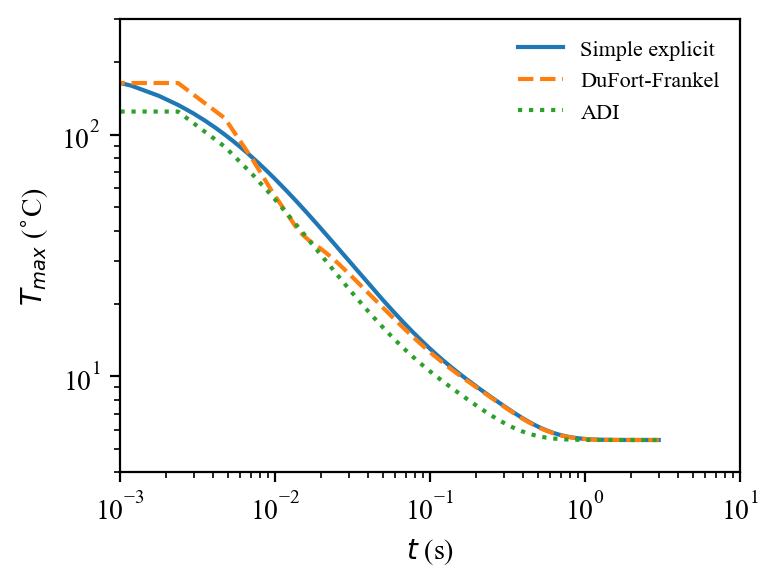

In [12]:
### Define grid info ###
xmin = -1.
xmax = 1.
ymin = -1.
ymax = 1.
nx = 41
ny = 41
dx = (xmax-xmin)/nx
dy = (ymax-ymin)/ny
beta = dx/dy
x = np.linspace(-1.,1,nx)
y = np.linspace(-1.,1,ny)
X, Y = np.meshgrid(x,y)

### Define simulation parameters ###
alpha = 1 # thermal diffusivity coefficient
tmax = 3 # maximum time to simulate, in seconds
T0 = 1   # initial uniform temperature
Q0 = 200 # source term

### Define source term ###
q = Q0*Q(X,Y)

### Define initial and boundary conditions ###
T = ICBC(X,Y,nx,ny,T0,Q0)

## Run simple explicit ###
print('Running simple explicit...')
# Tunable CFL condition number
r = 0.5
tic = time.perf_counter()
resultSE = SE(T,X,Y,q,alpha,beta,dx,tmax,r)
toc = time.perf_counter()
print('Simple explicit finished in',resultSE[2],'timesteps. Execution took', (toc-tic),'seconds')

#### Run DuFort-Frankel ###
# Re-itialize initial and boundary conditions
T = ICBC(X,Y,nx,ny,T0,Q0)
print('Running DuFort-Frankel...')
r = 2
tic = time.perf_counter()
resultDF = DF(T,X,Y,q,alpha,beta,dx,tmax,r)
toc = time.perf_counter()
print('DuFort-Frankel finished in',resultDF[2],'timesteps. Execution took', (toc-tic),'seconds')

### Run ADI ###
# Re-itialize initial and boundary conditions
T = ICBC(X,Y,nx,ny,T0,Q0)
print('Running ADI...')
r = 2
tic = time.perf_counter()
resultADI = ADI(T,X,Y,q,alpha,beta,dx,tmax,nx,ny,r)
toc = time.perf_counter()
print('ADI finished in',resultADI[2],'timesteps. Execution took', (toc-tic), 'seconds')


# Plot in logscale decay of max temperature with time

plt.rcParams['font.family'] = 'Times New Roman'
fig = plt.figure(figsize=(4, 3),dpi=200)
plt.xlim([1e-3,10])
plt.ylim([4,300])
plt.loglog(resultSE[0],resultSE[1],ls='solid',label='Simple explicit')
plt.loglog(resultDF[0],resultDF[1],ls='dashed',label='DuFort-Frankel')
plt.loglog(resultADI[0],resultADI[1],ls='dotted',label='ADI')
plt.legend(frameon=False,fontsize=8)
plt.xlabel('$t$ (s)')
plt.ylabel('$T_{max}$ ($^{\circ}$C)')

Notice the difference in the simulation time between the explicit (SE, DF) and implicit (ADI) methods:

| Method           | Simulation time (s)  | Number of time steps |
|------------------|-------------------|-------------------------|
| Simple explicit  | 0.356             | 5043      |
| DuFort-Frankel   | 0.086             | 1261      |
| ADI              | 14.49             | 1261      |

Even thought ADI requires the same number of time steps as the DuFort-Frankel method, the cost per timestep is *much* higher because it needs to solve a linear system twice per time step, resulting in much higher computational expense.

Also notice that the DuFort-Frankel method and the Simple explicit methods seem to agree much better in terms of the $T_{max}$ value as a function of time. It suggests that the DuFort-Frankel method may have better temporal accuracy. However, it is hard to say for certain, because we don't have an analytical solution to compare against.

A final interesting point: notice how all three methods converge to the same steady-state solution at around 1 s. This is an interesting property of the parabolic equation that we are solving--it marches to a steady state solution. If all we cared about was the steady-state temperature field, and we didn't care how the field evolved to that solution in time, we could have removed the time-derivative from the governing equation from the very beginning and solved the problem exactly in the same way as the steady 2D heat equation.

As a final piece of eye-candy, let's plot an animation of the temperature field solution as it evolves in time. This was taken from the DuFort-Frankel method:

In [38]:
from IPython.display import HTML

HTML("""
    <video alt="test" controls>
        <source src="output2.mp4" type="video/mp4">
    </video>
""")